<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/2_3_9_%EC%8B%A0%EA%B2%BD%EB%A7%9D(%EB%94%A5%EB%9F%AC%EB%8B%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=4a57eb0836bdb5d82e006e04ef35cab8b87030f354e6d6c5420086e51e048e87
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import matplotlib
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(font_scale=3)
sns.set(rc = {'figure.figsize':(15,8)})

from pandas.core.common import random_state

# 서론
신경망이라 알려진 알고리즘들은 최근 '딥러닝'이란 이름으로 다시 주목받고 있다.
딥러닝에 대한 거는 대중들의 기대는 크지만, 현실은 아직 특정 분야에 정교하게 적용되어 있을 때가 많다. 
여기선 복잡한 딥러닝 알고리즘의 출발점이며 비교적 간단하게 분류와 회귀에 쓸 수 있는 다중 퍼셉트론(MLP)을 다룬다. multilayer perceptrons은 기본 feed-foward 신경망, 또는 종종 그냥 신경망이라고도 한다.

## 신경망 모델
MLP은 여러 단계를 거쳐 결정을 만들어내는 선형 모델의 일반화된 모습이라고 볼 수 있다.

\
비교를 위해 선형 회귀모델은 다음과 같다

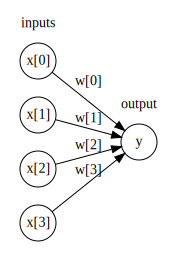

In [3]:
mglearn.plots.plot_logistic_regression_graph()

MLP에서는 가중치 합을 만드는 과정이 여러 번 반복되며, 먼저 중간 단계를 구상하는 은닉 유닛을 계산하고 이를 이용하여 최종 결과를 산출하기 우해 다시 가중치 합을 계산한다.

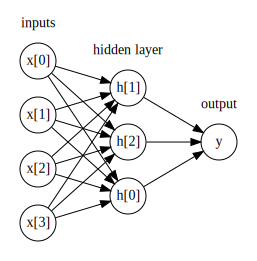

In [4]:
mglearn.plots.plot_single_hidden_layer_graph()

모델은 많은 계수를 학습해야 한다. 이 계수는 각 입력과 은닉층의 은닉 유닛 사이, 그리고 각 은닉 유닛과 출력 사이마다 있다.
(이래서 신경망이라고 하는구나. 모든 망이 연결되어 있어서!)

여러 개의 가중치 합을 계산하는 것은 수학적으로 보면 하나의 가충치 합을 계산하는 것과 같다. 그래서 이 모델을 선형 모델보다 강력하게 만들려면 또 다른 기교가 필요하다. 각 은닉 유닛의 가중치 합을 계산한 후 그 결과에 빈선형 함수인 렐루(ReLU)나 하이퍼볼릭 탄젠트(tanh)를 적용한다. 이 함수 결과의 가중치 합을 계산하여 출력 y 값을 만든다.

- 렐루 함수는 0 이하를 잘라버린다.
- tanh 함수는 낮은 입력값에 대해서는 -1로 수렵하고 큰 입력값에 대해서 +1로 수렴한다. 

\
이런 비선형 함수는 결과적으로 신경망이 선형 모델에서 보다 훨씬 더 복잡한 함수를 학습할 수 있도록 해준다.

Text(0, 0.5, 'relu(x), tanh(x)')

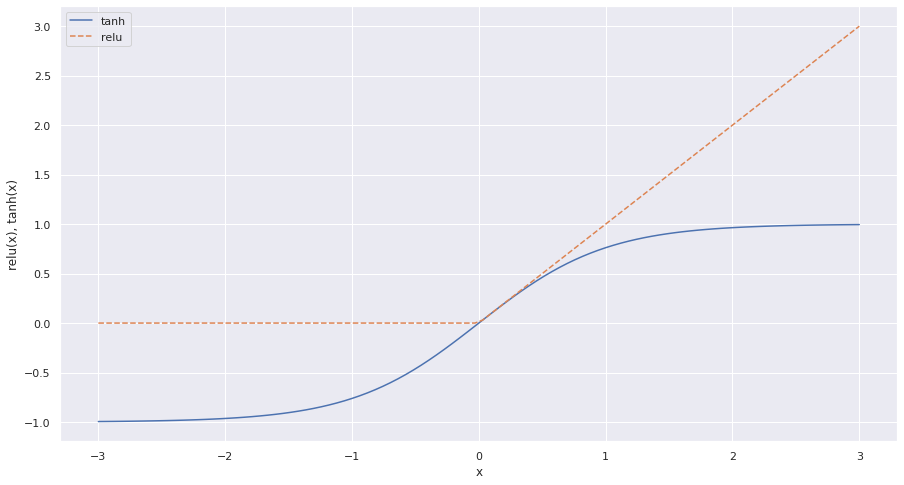

In [7]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle= '--', label='relu')
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

우리가 정해야 하는 중요한 매개변수는 은닉층의 유닛 개수이다. 소규모 데이터셋일 경우 10개 정도도 괜찮지만 매우 복잡한 데이터셋에서는 10,000개가 될 수도 있다

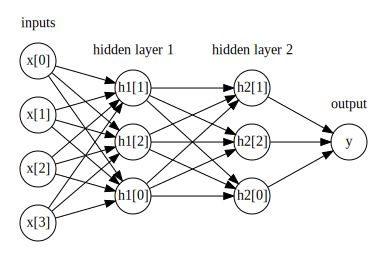

In [8]:
mglearn.plots.plot_two_hidden_layer_graph()

이와 같이 많은 은닉층으로 구성된 대규모의 신경망이 생기면서 이를 딥러닝이라고 부르게 되었다.

## 신경망 튜닝

앞서 본 two_moons 데이터셋에 분류를 위한 다층 퍼셉트론(MLP) 구현인 MLPClassifier를 적용해보자.

Text(0, 0.5, 'feature 1')

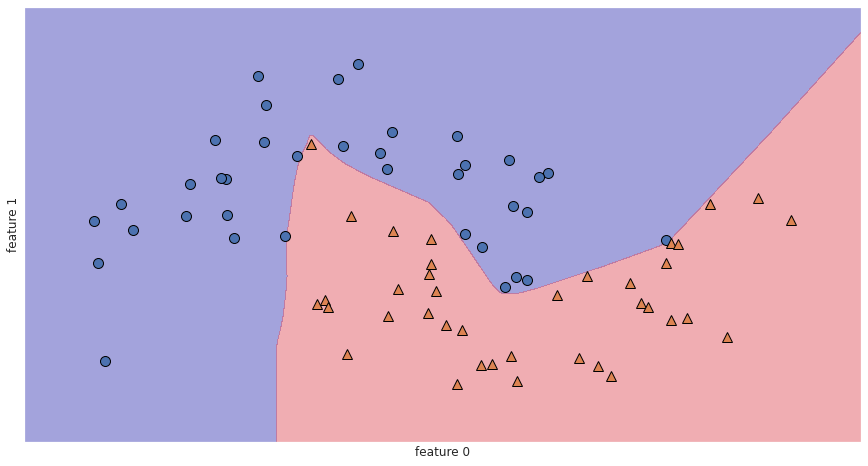

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

그림에서 보듯 신경망은 매우 비선형적이지만 비교적 매끄러운 결정 경계를 만들었따.
여기서 사용한 최적화 알고리즘은 solver='lbfgs'이다
MLP는 기본적으로 은닉 유닛 100개를 사용한다. 이런 작은 데이터셋에는 과분하다. 따라서 은닉 개수를 줄여도 여전히 좋은 결과를 얻을 수 있다

Text(0, 0.5, 'feature 1')

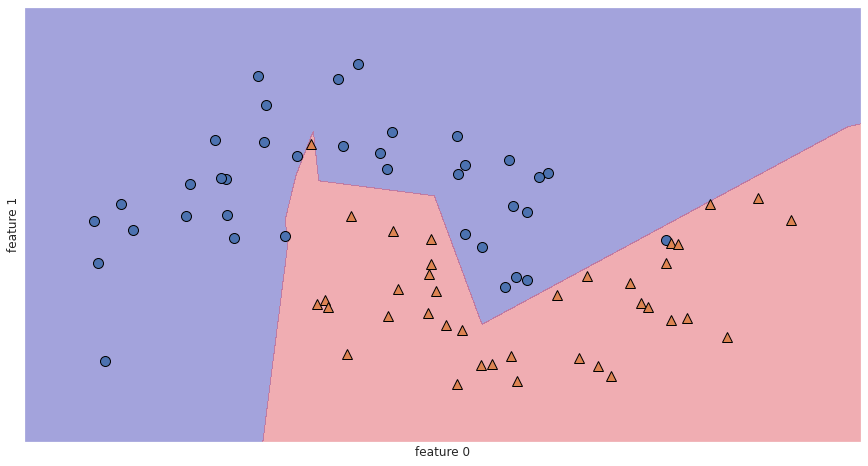

In [12]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10], max_fun=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

은닉 유닛이 10개여서 결정 경계가 조금 날카로워졌다. 
기본 비선형 함수는 럴루이다. 은닉층이 하나이므로 결정 경계를 만드는 함수는 직선 10개가 합쳐져서 구성된다. 더 매끄러운 경계를 원한다면 은닉 유닉을 추가하거나 은익층을 추가하거나, tahn 함수를 사용할 수 있다.